In [32]:
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [33]:
df_original = pd.read_csv('MOESM1_ESM.csv')

In [34]:
print(df_original.columns.values)

['id' 'a_atom' 'b1_atom' 'b2_atom' 'composition' 'distance_a'
 'distance_b1' 'distance_b2' 'x_atom' 'cubic' 'ortho' 'eleneg_a'
 'eleneg_b1' 'eleneg_b2' 'eleneg_x' 'hoe_a' 'hoe_b1' 'hoe_b2' 'hoe_x'
 'ionenergy_a' 'ionenergy_b1' 'ionenergy_b2' 'ionenergy_x' 'luep_a'
 'luep_b1' 'luep_b2' 'luep_x' 'rd_a' 'rd_b1' 'rd_b2' 'rd_x' 'rp_a' 'rp_b1'
 'rp_b2' 'rp_x' 'rs_a' 'rs_b1' 'rs_b2' 'rs_x' 'ind_gap'
 'heat_of_formation']


In [35]:
df_original

,id,a_atom,b1_atom,b2_atom,composition,distance_a,distance_b1,distance_b2,x_atom,cubic,...,rp_a,rp_b1,rp_b2,rp_x,rs_a,rs_b1,rs_b2,rs_x,ind_gap,heat_of_formation
0,Cs.Ag.Al.Br-cubic,Cs,Ag,Al,Cs.Ag.Al.Br,3.870604,2.912570,2.555464,Br,1,...,2.60,1.33,0.905,0.62,1.71,1.045,0.77,0.580,1.0274,-1.240558
1,Cs.Ag.As.Br-cubic,Cs,Ag,As,Cs.Ag.As.Br,3.925597,2.858240,2.692150,Br,1,...,2.60,1.33,0.745,0.62,1.71,1.045,0.67,0.580,0.7810,-1.012833
2,Cs.Ag.Bi.Br-cubic,Cs,Ag,Bi,Cs.Ag.Bi.Br,4.059806,2.856817,2.884582,Br,1,...,2.60,1.33,1.077,0.62,1.71,1.045,0.92,0.580,1.1399,-1.145090
3,Cs.Ag.Ga.Br-cubic,Cs,Ag,Ga,Cs.Ag.Ga.Br,3.887140,2.881822,2.612114,Br,1,...,2.60,1.33,0.935,0.62,1.71,1.045,0.76,0.580,0.0000,-1.112540
4,Cs.Ag.In.Br-cubic,Cs,Ag,In,Cs.Ag.In.Br,3.966402,2.870028,2.738541,Br,1,...,2.60,1.33,1.110,0.62,1.71,1.045,0.94,0.580,0.1818,-1.162859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Rb.Tl.As.I-ortho,Rb,Tl,As,Rb.Tl.As.I,4.036116,3.440632,2.907324,I,0,...,2.43,1.22,0.745,0.83,1.67,1.015,0.67,0.755,1.0584,-0.814923
536,Rb.Tl.Bi.I-ortho,Rb,Tl,Bi,Rb.Tl.Bi.I,4.097096,3.486896,3.118286,I,0,...,2.43,1.22,1.077,0.83,1.67,1.015,0.92,0.755,1.0077,-0.943624
537,Rb.Tl.Ga.I-ortho,Rb,Tl,Ga,Rb.Tl.Ga.I,4.024081,3.456462,2.850256,I,0,...,2.43,1.22,0.935,0.83,1.67,1.015,0.76,0.755,0.7727,-0.877934
538,Rb.Tl.In.I-ortho,Rb,Tl,In,Rb.Tl.In.I,4.057470,3.475991,2.977066,I,0,...,2.43,1.22,1.110,0.83,1.67,1.015,0.94,0.755,1.1472,-0.940822


In [36]:
x = df_original[['distance_a', 'distance_b1', 'distance_b2',
                 'cubic', 'ortho', 'eleneg_a', 'eleneg_b1', 'eleneg_b2', 'eleneg_x', 'hoe_a',
                 'hoe_b1', 'hoe_b2', 'hoe_x', 'ionenergy_a', 'ionenergy_b1','ionenergy_b2', 'ionenergy_x',
                 'luep_a', 'luep_b1', 'luep_b2', 'luep_x', 'rd_a', 'rd_b1','rd_b2', 'rd_x', 'rp_a', 'rp_b1',
                 'rp_b2', 'rp_x', 'rs_a', 'rs_b1', 'rs_b2', 'rs_x']]

y_bandgap = df_original['ind_gap']
y_stability = df_original['heat_of_formation']

x_train, x_test, y_train, y_test = train_test_split(x, y_bandgap, test_size = 0.2) # 논문에서 8:2 지정
#x_train, x_test, y_train, y_test = train_test_split(x, y_stability, test_size = 0.2) # 논문에서 8:2 지정

In [37]:
model = xgboost.XGBRegressor(n_estimators = 240, learning_rate=0.15)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})
result.head()

,pred,real
188,0.246074,0.0000
342,1.237317,1.2881
186,-0.076134,0.0000
2,0.941783,1.1399
292,0.787098,1.0754


In [38]:
model.score(x_test, y_test)

0.9258630129391032

In [39]:
rmse = np.sqrt(MSE(y_pred, y_test))
print("RMSE : % f" %(rmse))

RMSE :  0.242943


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

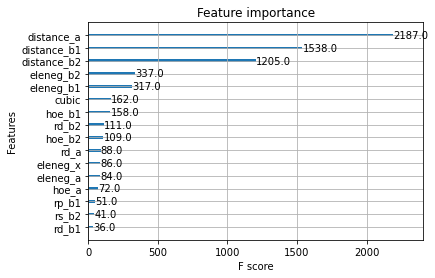

In [42]:
xgboost.plot_importance(model)

In [44]:
r_sq = model.score(x_test, y_test)
print(r_sq)

0.9258630129391032
